In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def getDf():
    files = {}
    for size in [9000000, 12000000,15000000, 18000000]:
        with open("../result/resultRustGenericVsTrait_{}.txt".format(size), "r") as f:
            files["size{}".format(size)] = [s.strip().split("#") for s in f.readlines()]

    dfs = {}
    for k in files.keys():
        df = pd.DataFrame(files[k])
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header
        dfs[k] = df
    data = dfs['size9000000']
    for s in [12000000,15000000, 18000000]:
        data = pd.concat([data, dfs["size{}".format(s)]])
    data = data.astype({"datastructure": str, "size": int, "method": str, "runtime":int,  \
                        'total': int})
    return data

In [3]:
df = getDf()

In [4]:
df_avg = df.groupby(["size", "method"]).mean().reset_index()

In [5]:
df_avg.head()

,size,method,runtime,total
0,9000000,"""generic""",2635.4,-281246474.8
1,9000000,"""trait""",2648.4,-281259431.4
2,12000000,"""generic""",3517.4,-374936681.4
3,12000000,"""trait""",3500.4,-374997632.6
4,15000000,"""generic""",134415.6,-945000000.0


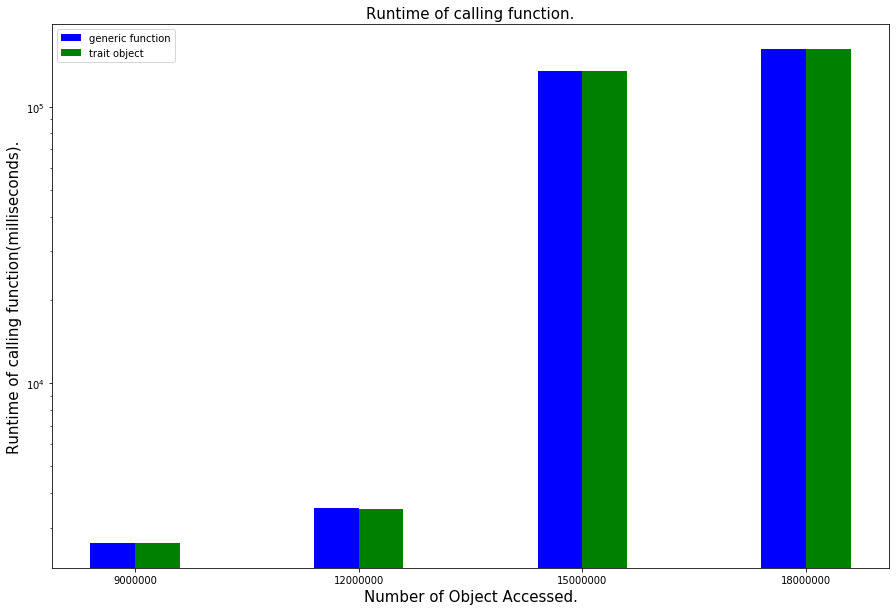

In [6]:
generic = df_avg[df_avg["method"] == '"generic"']
trait = df_avg[df_avg["method"] == '"trait"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg['size'].nunique())
b1 = ax.bar(idx - w / 2, generic["runtime"], width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w / 2, trait["runtime"], width = w, color ='g', align = 'center')
label = np.sort(df_avg['size'].unique())
ax.set_xticks(idx)
ax.set_xticklabels(label)
ax.set_xlabel("Number of Object Accessed.", fontsize = 15)
ax.set_ylabel("Runtime of calling function(milliseconds).", fontsize = 15)
ax.set_title("Runtime of calling function.", fontsize = 15)
ax.legend((b1, b2), ("generic function", "trait object"))
ax.set_yscale('log')
#fig.savefig("rust_borrowing.eps")
#fig.savefig("rust_borrowing.png")
plt.show()